In [1]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
master = pd.read_csv('../input/master.csv')


['master.csv']


Select random rows from the data frame

In [2]:
master.take(np.random.permutation(len(master))[:10])

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
12648,Israel,2004,male,15-24 years,68,570981,11.91,Israel2004,NaN,"135,445,033,199",22168,Millenials
19683,Puerto Rico,1985,male,25-34 years,43,235800,18.24,Puerto Rico1985,NaN,"20,289,200,000",6582,Boomers
2619,Bahamas,2012,female,75+ years,0,6463,0.00,Bahamas2012,0.783,"10,720,500,000",31204,Silent
13638,Japan,2007,male,5-14 years,31,6027000,0.51,Japan2007,NaN,"4,515,264,514,431",37408,Generation Z
11298,Guyana,2008,female,15-24 years,13,66821,19.45,Guyana2008,NaN,"1,922,598,121",2873,Millenials
11441,Hungary,1997,female,55-74 years,303,1191288,25.43,Hungary1997,NaN,"47,290,180,589",4856,Silent
8502,Estonia,2007,male,15-24 years,21,100450,20.91,Estonia2007,NaN,"22,237,061,730",17504,Millenials
3058,Barbados,2003,female,35-54 years,0,41911,0.00,Barbados2003,NaN,"3,274,850,000",12887,Boomers
13277,Jamaica,2002,male,5-14 years,0,289686,0.00,Jamaica2002,NaN,"9,694,169,757",4013,Millenials
15925,Malta,1994,female,25-34 years,0,25500,0.00,Malta1994,NaN,"2,998,570,147",8775,Boomers


In [3]:
master.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Check for categorical variables, print the categorical columns names and values

In [4]:
for i in master.columns:
    if master[i].dtypes == object and len(master[i].unique()) < 1000:
        print(i)
        print(master[i].unique())

country
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'


**A. Data cleaning**


In [5]:
# Check how many data are there for each year
master.groupby('year').year.count()

year
1985     576
1986     576
1987     648
1988     588
1989     624
1990     768
1991     768
1992     780
1993     780
1994     816
1995     936
1996     924
1997     924
1998     948
1999     996
2000    1032
2001    1056
2002    1032
2003    1032
2004    1008
2005    1008
2006    1020
2007    1032
2008    1020
2009    1068
2010    1056
2011    1032
2012     972
2013     960
2014     936
2015     744
2016     160
Name: year, dtype: int64

Text(0, 0.5, 'suicide number')

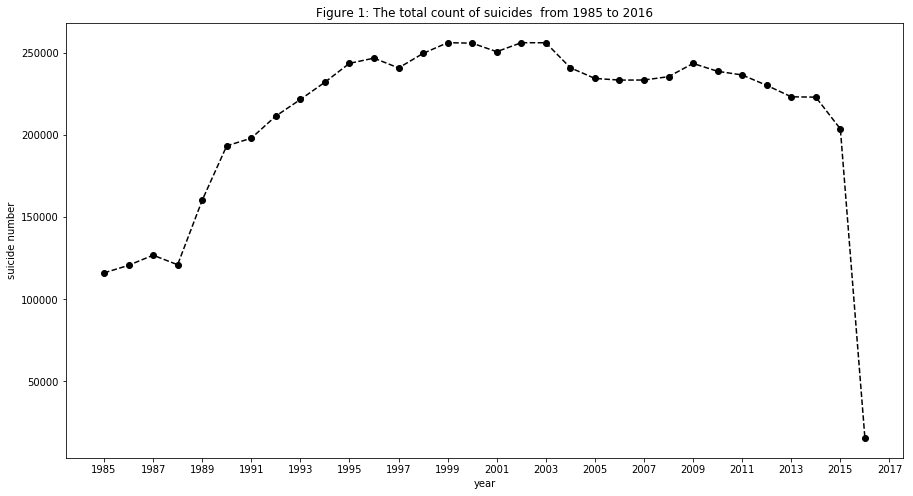

In [6]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(master.groupby(['year']).suicides_no.sum(),'ko--')
tick = ax.set_xticks(range(1985,2018,2))
ax.set_title('Figure 1: The total count of suicides  from 1985 to 2016')
ax.set_xlabel('year')
ax.set_ylabel('suicide number')

There is less data collected in 2016, which causes the sudden drop of the count of suicides in 2016. That makes me start to think how the data was collected each year. 

when I look into the country list of each year, I find that:

* Every year, differnt list of country contribute to the total population, total count of suicides, sex, age group
* The number of countributed country has a strong positive correlation with the total annual population and total annual count of suicides
* Make a line graph on year with the raw data may lead us to draw inaccurate conclusion.

In [7]:
# check the total number of country
len(master.country.unique())

101

Check the total number of contributed country of each year (1985 - 2016).

In [8]:
def count_country(group):
    return len(group.country.unique())
country_no = master.groupby('year').apply(count_country)
country_no.name = 'number_of_country'
country_no

year
1985    48
1986    48
1987    54
1988    49
1989    52
1990    64
1991    64
1992    65
1993    65
1994    68
1995    78
1996    77
1997    77
1998    79
1999    83
2000    86
2001    88
2002    86
2003    86
2004    84
2005    84
2006    85
2007    86
2008    85
2009    89
2010    88
2011    86
2012    81
2013    80
2014    78
2015    62
2016    16
Name: number_of_country, dtype: int64

In 2016, the data were collected from 16 countries while in other years, data were collected from over 48 countries.

In [9]:
# I want to know the occurances of each 101 countries from 1985 - 2016. 
def count_year(group):
    return len(group.year.unique())
country_o = master.groupby('country').apply(count_year).sort_values(ascending = False)
country_o.name = 'occurances of country'
country_o

country
Austria                   32
Netherlands               32
Iceland                   32
Mauritius                 32
Brazil                    31
Italy                     31
Colombia                  31
Israel                    31
Chile                     31
Malta                     31
Puerto Rico               31
Republic of Korea         31
Belgium                   31
Singapore                 31
Japan                     31
Mexico                    31
Spain                     31
Argentina                 31
United States             31
Luxembourg                31
United Kingdom            31
Greece                    31
Ecuador                   31
Costa Rica                30
Ireland                   30
Guatemala                 30
Norway                    30
Bulgaria                  30
Sweden                    30
France                    30
                          ..
Estonia                   21
Latvia                    21
Slovenia                  21
Bahrai

In [10]:
# Find the number of country that appear less that 20 times over the 32 years
country_o[country_o < 20]
# There were 24 countries appear less than 20 times over the 32 years. 
# About 25% of country are missing more than 10 yr of data.

country
Serbia                    18
Seychelles                18
Jamaica                   17
Azerbaijan                16
Cyprus                    15
Qatar                     15
Philippines               15
Aruba                     14
Kiribati                  11
Fiji                      11
Sri Lanka                 11
Montenegro                10
Maldives                  10
Turkey                     7
United Arab Emirates       6
Nicaragua                  6
Oman                       3
San Marino                 3
Saint Kitts and Nevis      3
Bosnia and Herzegovina     2
Dominica                   1
Macau                      1
Mongolia                   1
Cabo Verde                 1
Name: occurances of country, dtype: int64

In [137]:
coun_year = master.groupby('country-year').population.sum()
full_country_year_list = []
for year in range(1985,2017):
    for country in master.country.unique():
        full_country_year_list.append(country + str(year))
        
full_country_year_df = pd.DataFrame(coun_year.reindex(full_country_year_list))

full_country_year_df['year'] = [i[-4:] for i in full_country_year_df.index]
full_country_year_df['country'] = [i[:-4] for i in full_country_year_df.index]

country_year_pivot = pd.pivot_table(full_country_year_df,values = 'population',columns = 'country',index='year',aggfunc = 'count')

country_year_pivot

country,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Barbados,Belarus,Belgium,Belize,Bosnia and Herzegovina,Brazil,Bulgaria,Cabo Verde,Canada,Chile,Colombia,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Denmark,Dominica,Ecuador,El Salvador,Estonia,Fiji,Finland,France,Georgia,Germany,Greece,Grenada,Guatemala,Guyana,...,Netherlands,New Zealand,Nicaragua,Norway,Oman,Panama,Paraguay,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Korea,Romania,Russian Federation,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and Grenadines,San Marino,Serbia,Seychelles,Singapore,Slovakia,Slovenia,South Africa,Spain,Sri Lanka,Suriname,Sweden,Switzerland,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1985,0,1,1,0,0,1,1,0,1,1,1,0,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,...,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,0
1986,0,1,1,0,0,1,1,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,...,1,1,0,1,0,1,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,0
1987,1,1,1,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,...,1,1,0,1,0,1,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,1,1,1,0
1988,1,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,1,1,...,1,1,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,1,1,0
1989,1,1,1,0,0,1,1,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,1,1,...,1,1,0,1,0,1,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,1,1,0
1990,0,1,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,...,1,1,0,1,0,0,1,0,1,1,1,0,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,1,1,1,1
1991,0,1,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,...,1,1,0,1,0,0,1,0,1,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1
1992,1,1,1,1,0,1,1,1,0,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,0,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,...,1,1,0,1,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1
1993,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,1,1,1,1,...,1,1,0,1,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,1,1,1


The table above indicates if the data of a country is available in the given year. 

0 -> data of the country in the given year isn't available 

1 -> data of the country in the given year is available 

The graph below visualises the completeness of the dataset. The black square indicates missing values for the corresponding country and year

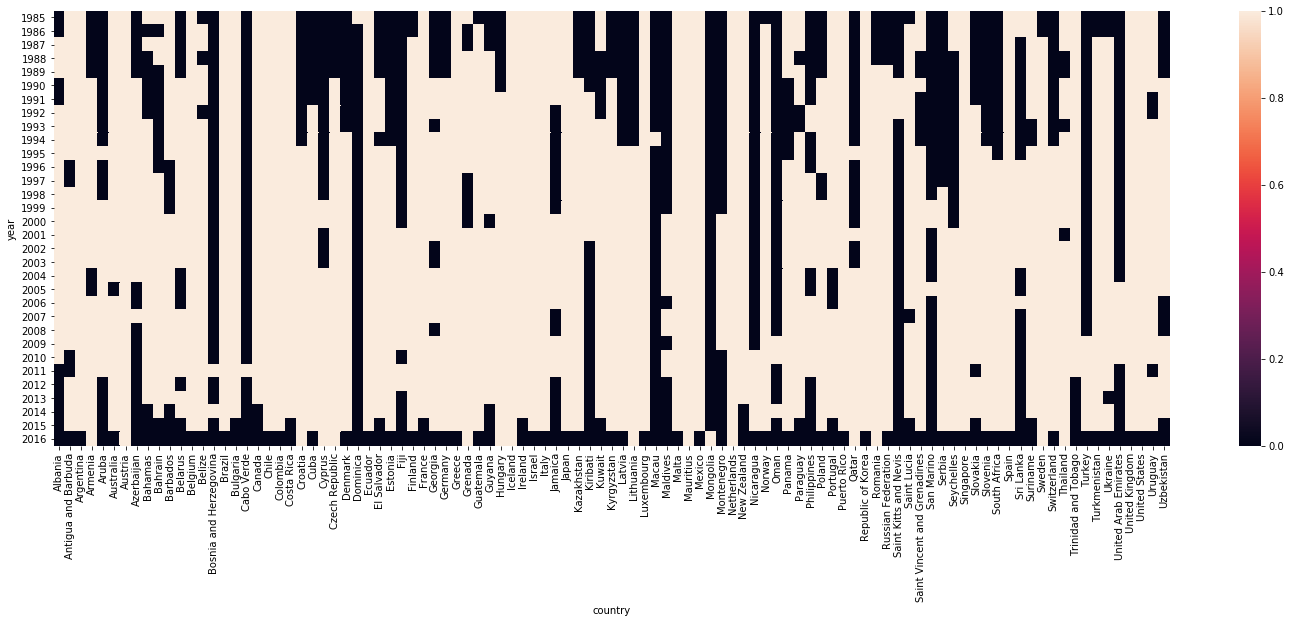

In [140]:
fig,axes = plt.subplots(figsize=(25,8))
sns.heatmap(country_year_pivot,ax=axes)

Now, I want to know if the number of contributed country is correlated with the number of yearly population, yearly suicide number and suicides rate

In [11]:
yr_grouped = master.groupby('year')
annual_pop = yr_grouped.population.sum()
annual_suicides = yr_grouped.suicides_no.sum()
annual_sui_rate = annual_suicides/annual_pop*100000
country_df = pd.concat([country_no,annual_suicides,annual_pop],axis = 1)
country_df['annual_sui_rate'] = country_df.suicides_no/country_df.population*100000
country_df.head(10)

,number_of_country,suicides_no,population,annual_sui_rate
year,,,,
1985,48,116063,1008600086,11.507336
1986,48,120670,1029909613,11.716562
1987,54,126842,1095029726,11.583430
1988,49,121026,1054094424,11.481514
1989,52,160244,1225514347,13.075653
1990,64,193361,1466620100,13.184123
1991,64,198020,1489988384,13.290036
1992,65,211473,1569539447,13.473570
1993,65,221565,1530416654,14.477430


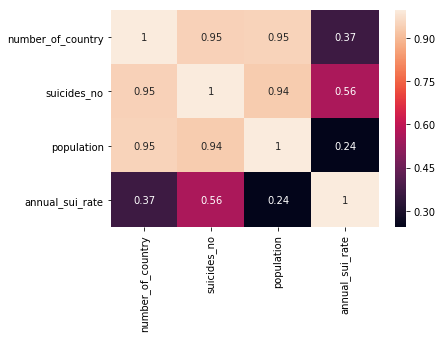

In [13]:
sns.heatmap(country_df.corr(),annot = True)

Text(0.5, 0, 'Annual suicide rate')

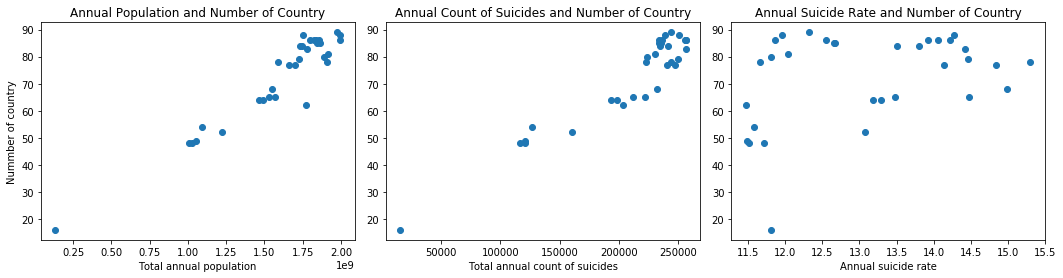

In [14]:
fig,axes = plt.subplots(1,3,figsize=(18,4))
axes[0].scatter(annual_pop,country_no)
axes[1].scatter(annual_suicides,country_no)
axes[2].scatter(annual_sui_rate,country_no)
plt.subplots_adjust(wspace=0.1, hspace=1)
axes[0].set_title('Annual Population and Number of Country')
axes[0].set_xlabel('Total annual population')
axes[0].set_ylabel('Nummber of country')
axes[1].set_title('Annual Count of Suicides and Number of Country')
axes[1].set_xlabel('Total annual count of suicides')
axes[2].set_title('Annual Suicide Rate and Number of Country')
axes[2].set_xlabel('Annual suicide rate')

The dot at the bottom left cornor belongs to year 2016

In [15]:
country_df[country_df.number_of_country == country_no.min()]

,number_of_country,suicides_no,population,annual_sui_rate
year,,,,
2016,16,15603,132101896,11.811337


In [16]:
# I drop data from 2016
# drop 'HDI for year' columns for too many na value
# drop 'country-year' and 'suicides/100k pop' columns for I don't use them
nmaster = master[~ (master.year == 2016)].drop(['HDI for year','country-year','suicides/100k pop'],axis = 1)
nmaster.head(10)

,country,year,sex,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,"2,156,624,900",796,Generation X


In [17]:
ncountry_o = nmaster.groupby('country').apply(count_year).sort_values(ascending = False)
ncountry_o[country_o >= 30] 
# what's Sweden doing over there? With a value of 29? Whyyyyy???

country
Chile                31
Netherlands          31
Israel               31
Italy                31
Brazil               31
Colombia             31
Belgium              31
Singapore            31
Iceland              31
Austria              31
Spain                31
Republic of Korea    31
Puerto Rico          31
Japan                31
Greece               31
Mexico               31
Mauritius            31
Argentina            31
Malta                31
Luxembourg           31
Ecuador              31
United Kingdom       31
United States        31
Norway               30
France               30
Costa Rica           30
Bulgaria             30
Australia            30
Ireland              30
Guatemala            30
Sweden               29
dtype: int64

In [18]:
# List of region that I selected, their data were collected continuely from 1985 to 2015
ncountry_o[country_o >= 31].index

Index(['Chile', 'Netherlands', 'Israel', 'Italy', 'Brazil', 'Colombia',
       'Belgium', 'Singapore', 'Iceland', 'Austria', 'Spain',
       'Republic of Korea', 'Puerto Rico', 'Japan', 'Greece', 'Mexico',
       'Mauritius', 'Argentina', 'Malta', 'Luxembourg', 'Ecuador',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

Text(0, 0.5, 'suicides rate')

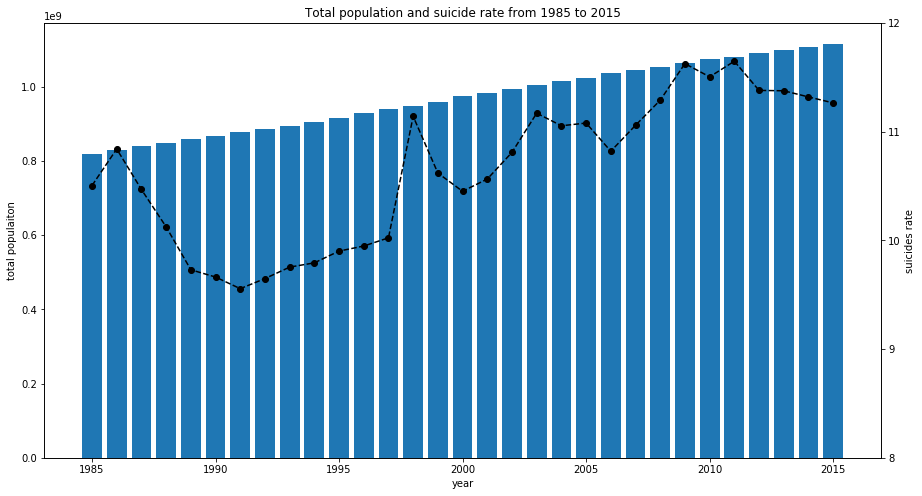

In [19]:
pmaster = nmaster[nmaster.country.isin(ncountry_o[country_o >= 31].index)]
fig,axes = plt.subplots(figsize = (15,8))
to_sui = pmaster.groupby(['year']).suicides_no.sum()
to_pop = pmaster.groupby(['year']).population.sum()
sui_rate = to_sui/(to_pop/100000)
axes.bar(range(1985,2016),to_pop)
axes1 =axes.twinx()
axes1.plot(range(1985,2016),sui_rate,'ko--')
axes1.set_yticks(range(8,13,1))
axes.set_title('Total population and suicide rate from 1985 to 2015')
axes.set_xlabel('year')
axes.set_ylabel('total populaiton')
axes1.set_ylabel('suicides rate')

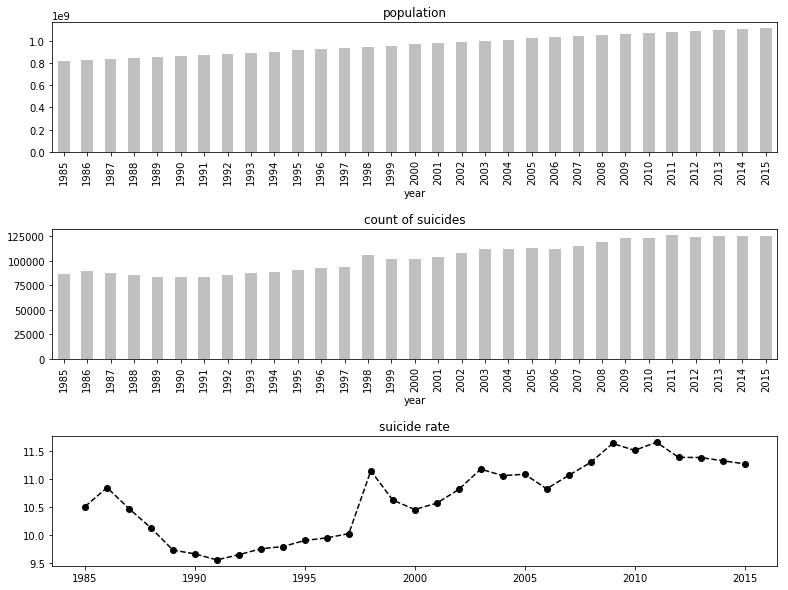

In [20]:
fig,axes = plt.subplots(3,1,figsize = (13,10))
to_pop.plot(kind='bar', ax=axes[0],title = 'population',color = 'silver')
to_sui.plot(kind = 'bar',ax = axes[1],title='count of suicides',color='silver')
axes[2].plot(sui_rate,'ko--')
axes[2].set_title('suicide rate')
plt.subplots_adjust(hspace=0.6)

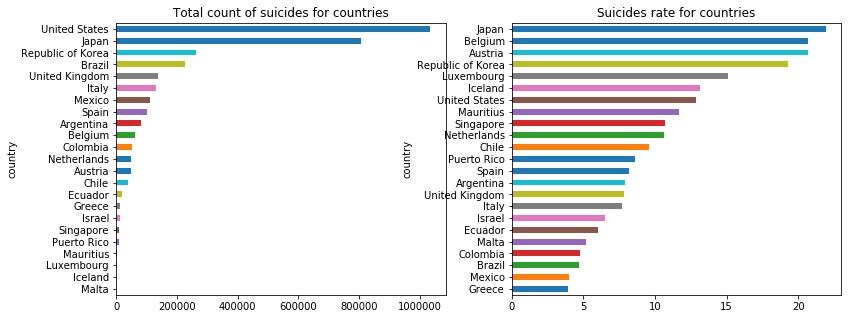

In [21]:
country_sui_no = pmaster.groupby(['country']).suicides_no.sum()
country_sui_no_sort = country_sui_no.sort_values()
country_pop = pmaster.groupby(['country']).population.sum()
country_sui_rate = country_sui_no/country_pop*100000
fig,axes = plt.subplots(1,2,figsize = (13,5))
country_sui_no_sort.plot(kind = 'barh',ax = axes[0],title = 'Total count of suicides for countries')
country_sui_rate.sort_values().plot(kind = 'barh',ax = axes[1],title = 'Suicides rate for countries')

In [22]:
# find the 5 highest count of suicides
top_count = country_sui_no_sort.nlargest(5)
top_count

country
United States        1034013
Japan                 806902
Republic of Korea     261730
Brazil                226613
United Kingdom        136805
Name: suicides_no, dtype: int64

In [23]:
# find the 5 highest suicides rate
top_rate = country_sui_rate.nlargest(5)
top_rate

country
Japan                21.920580
Belgium              20.692535
Austria              20.676193
Republic of Korea    19.316652
Luxembourg           15.116007
dtype: float64

In [24]:
top_count[top_count.index.isin(top_rate.index)].index

Index(['Japan', 'Republic of Korea'], dtype='object', name='country')

Japan and Republic of Korea are in both top 5 total count of suicides and top 5 suicides rate groups.

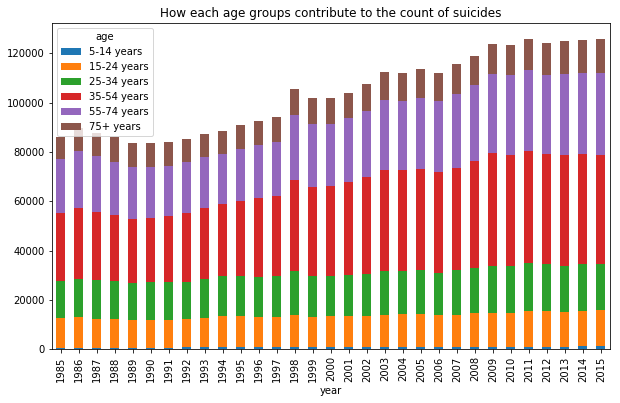

In [25]:
age_group = pd.pivot_table(pmaster,index=['year'],values='suicides_no',columns=['age'],aggfunc=np.sum)
sui_age=age_group[['5-14 years','15-24 years', '25-34 years', '35-54 years','55-74 years', '75+ years']]
sui_age.plot(kind = 'bar',figsize=(10,6),stacked=True,title='How each age groups contribute to the count of suicides')

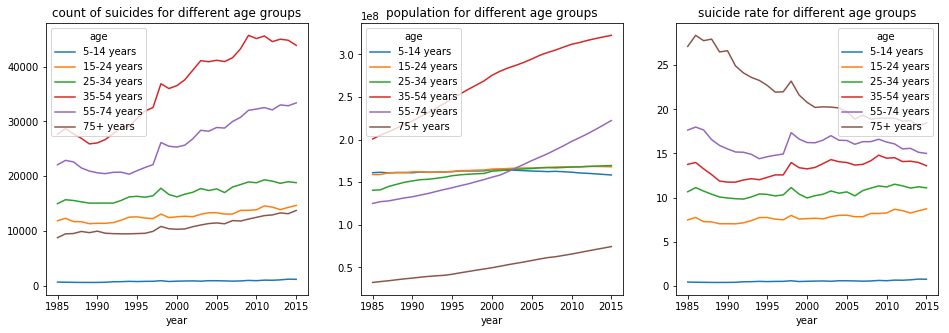

In [26]:
fig,axes = plt.subplots(1,3,figsize = (16,5))
sui_age.plot(ax=axes[0],title = 'count of suicides for different age groups')
pop_group = pd.pivot_table(pmaster,index=['year'],values='population',columns=['age'],aggfunc=np.sum)
pop_age = pop_group[['5-14 years','15-24 years', '25-34 years', '35-54 years','55-74 years', '75+ years']]
pop_age.plot(ax=axes[1],title = 'population for different age groups')
rate_age = sui_age/pop_age*100000
rate_age.plot(ax=axes[2],title = 'suicide rate for different age groups')

In [27]:
# prepare a nested donut chart for age and sex (part i)
group1=pmaster.groupby(['age','sex'],as_index = False).suicides_no.sum()
group1['percent']=round(group1.suicides_no/group1.suicides_no.sum()*100,2)
group1['sex and percent'] = group1.sex + ' ' + group1.percent.apply(str) +'%'
group1

,age,sex,suicides_no,percent,sex and percent
0,15-24 years,female,91185,2.83,female 2.83%
1,15-24 years,male,306330,9.52,male 9.52%
2,25-34 years,female,116987,3.64,female 3.64%
3,25-34 years,male,409184,12.72,male 12.72%
4,35-54 years,female,269243,8.37,female 8.37%
5,35-54 years,male,850917,26.45,male 26.45%
6,5-14 years,female,9534,0.30,female 0.3%
7,5-14 years,male,16727,0.52,male 0.52%
8,55-74 years,female,215060,6.68,female 6.68%
9,55-74 years,male,595126,18.50,male 18.5%


In [28]:
# prepare a nested donut chart for age and sex (part ii)
group2 = group_by_age=pmaster.groupby('age').suicides_no.sum()
group2 = group2.to_frame()
group2['percent'] = round(group2.suicides_no/group2.suicides_no.sum()*100,2)
group2['age and percent'] = group2.index + ' ' + group2.percent.apply(str) +'%'
group2

,suicides_no,percent,age and percent
age,,,
15-24 years,397515,12.36,15-24 years 12.36%
25-34 years,526171,16.36,25-34 years 16.36%
35-54 years,1120160,34.82,35-54 years 34.82%
5-14 years,26261,0.82,5-14 years 0.82%
55-74 years,810186,25.18,55-74 years 25.18%
75+ years,336806,10.47,75+ years 10.47%


Text(0.5, 1.0, 'Nested donut chart for age and sex')

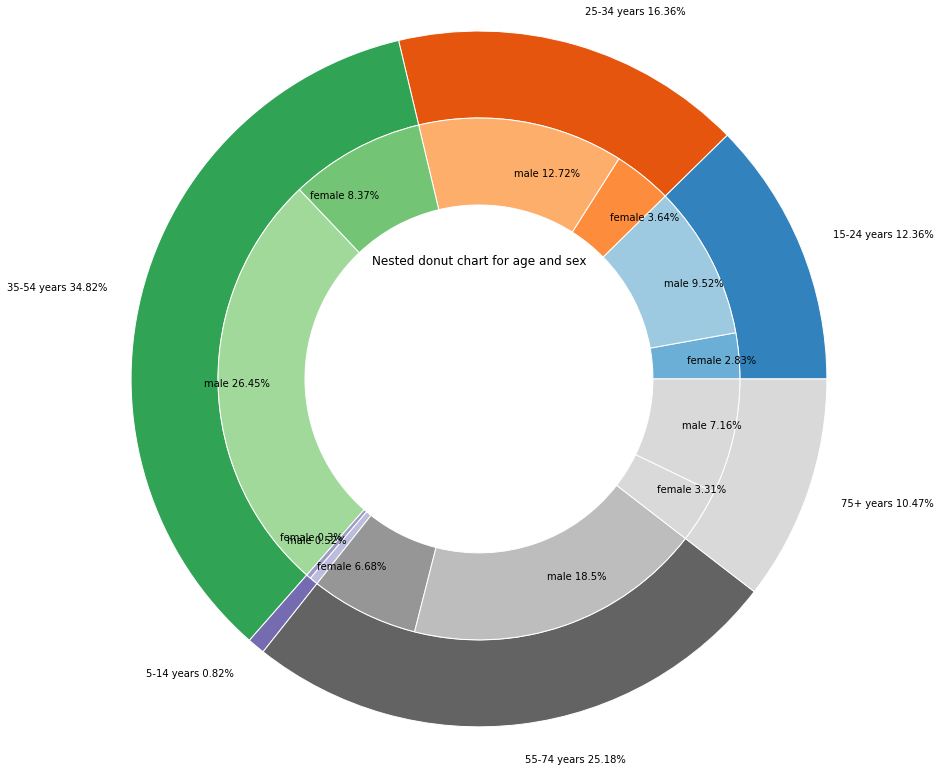

In [29]:
# draw the nested donut chart
fig, ax = plt.subplots()
ax.axis('equal')
width = 1
cm = plt.get_cmap("tab20c")
cout = cm(np.arange(6)*4)
pie, _ = ax.pie(group2.suicides_no, radius=4, labels=group2['age and percent'], colors=cout)
plt.setp( pie, width=width, edgecolor='white')
cin = cm(np.array([1,2,5,6,9,10,13,14,17,18,21,22]))
pie2, _ = ax.pie(group1.suicides_no, radius=4-width, labels=group1['sex and percent'],labeldistance=0.8,colors=cin)
plt.setp( pie2, width=width, edgecolor='white')
ax.set_title('Nested donut chart for age and sex')

Check the sex ratio of each age group and look into the gender difference on the count of suisides. 

The sex ratio = Male / Female

In [30]:
sex_ratio = pd.pivot_table(pmaster,values = 'suicides_no',index = ['age'],columns = ['sex'],aggfunc=np.sum)
sex_ratio['ratio'] = sex_ratio.male/sex_ratio.female
sex_ratio.take([3,0,1,2,4,5])

sex,female,male,ratio
age,,,
5-14 years,9534,16727,1.754458
15-24 years,91185,306330,3.359434
25-34 years,116987,409184,3.497688
35-54 years,269243,850917,3.160405
55-74 years,215060,595126,2.767256
75+ years,106496,230310,2.162616


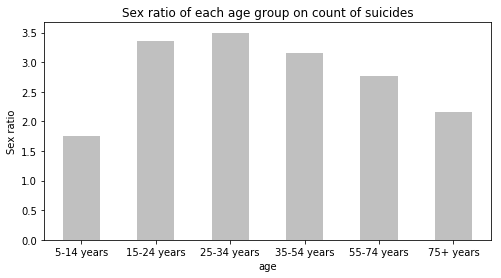

In [31]:
ratio_chart = sex_ratio.take([3,0,1,2,4,5]).ratio.plot(kind = 'bar',color = 'silver',figsize = (8,4),title = 'Sex ratio of each age group on count of suicides')
ratio_chart.set(ylabel = 'Sex ratio') 
ratio_chart.tick_params(axis='x', rotation=0)

* The sex ratio of each age group are all larger than 1, so the count of suicides of male is always larger than the female. 
* The largest gender different belongs to 25-34 age group, the corresponding count of suicided for Male : Female = 3.5 : 1

Reference: 

McKinney, Wes. (2012) *Python for Data Analysis*

https://stackoverflow.com/questions/44153457/double-donut-chart-in-matplotlib

https://matplotlib.org/gallery/pie_and_polar_charts/nested_pie.html#sphx-glr-gallery-pie-and-polar-charts-nested-pie-py